# <center>Laboratorium 9<br>Metody Numeryczne</center>

Instrukcja:  
Na zajęciach należy wykonać poniższe zadania, a następnie sporządzić sprawozdanie zawierające odpowiedzi (w postaci kodu) z komentarzami w środowisku Jupyter Notebook i umieścić je na platformie e-learningowej.

***Materiały przygotowujące:***


In [1]:
import main
import numpy as np
import scipy.optimize
import matplotlib
import matplotlib.pyplot as plt
import math
import dill

expected = dill.load(open('expected','rb'))

results_bisection = expected['bisection']
f = results_bisection[12][2]
a = results_bisection[12][1]

f(a)

ModuleNotFoundError: No module named 'dill'

***Temat główny:***

Znajdź miejsca zerowe funkcji: 
$$ 
f(x) = e^{-2x} + x^2 - 1 
$$,

metodami:
* Bisekcji,
* Siecznych,
* Newtona

Funkcja i jej pochodne zostały zaimplementowane w *main.py*

***Zadanie 1.***  
Wykonaj wykres funckji oraz jej pierwszej i drugiej pochodnej (obliczonej analitycznie) na jednym rysunku w przedziale pozwalającym na zgrubne określenie miejsc zerowych. Wykres powinien być odpowiednio opisany. Określ przedział miejsca zerowego.

(-10.0, 10.0)

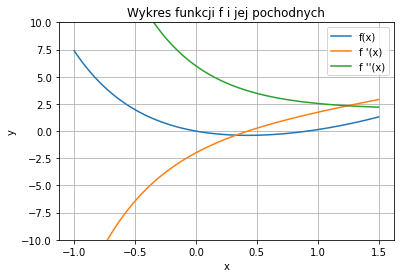

In [2]:
x = np.linspace(-1,1.5,100)
f = main.fun(x)
df = main.dfun(x)
ddf = main.ddfun(x)

plt.figure()
plt.plot(x,f,label='funkcja f')
plt.plot(x,df,label='funkcja df/dx')
plt.plot(x,ddf,label='funkcja ddf/ddx')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Wykres funkcji f i jej pochodnych')
plt.grid(True)
plt.legend(("f(x)", "f \'(x)", "f \'\'(x)"))
plt.ylim([-10,10])


***Zadanie 2.***  
Zaimplementuj [metodę bisekcji](https://en.wikipedia.org/wiki/Bisection_method)

Gwarancja zbieżności:

1) funkcja jest ciągła na danym przedziale [a,b]

2) funkcja na końcach przedziału przyjmuje przeciwne znaki

***Zadanie 3.***  
Zaimplementuj [metodę siecznych](https://en.wikipedia.org/wiki/Secant_method)

Gwarancja zbieżności:

1) funkcja jest ciągła na danym przedziale [a,b]

2) Pierwsza i druga pochodna istnieją i są ciągłe w przedziale domkniętym [a,b]

3) funkcja na końcach przedziału przyjmuje przeciwne znaki

4) pierwsza i druga pochodna mają stały znak (brak eksremów lokalnych i punktów przegięcia)


***Zadanie 4.***  
Zaimplementuj [metodę Newtona](https://en.wikipedia.org/wiki/Newton%27s_method)

Gwarancja zbieżności:

1) funkcja jest ciągła na danym przedziale [a,b]

2) Pierwsza i druga pochodna istnieją i są ciągłe w przedziale domkniętym [a,b]

3) funkcja na końcach przedziału przyjmuje przeciwne znaki

4) pierwsza i druga pochodna mają stały znak (brak eksremów lokalnych i punktów przegięcia)


***Zadania 5.***  
Dla głównej funkcji z zadania 1 znajdź miejsca zerowe przy użyciu:

* funkcji root dostępnej w pakiecie scipy.optimize
* funkcji fsolve dostępnej w pakiecie scipy.optimize


In [3]:
# Obliczanie miejsc zerowych sposób pierwszy funkcją root z pakietu scipy.optimize
x1 = np.linspace(-0.5, 0.5, 100)
x2 = np.linspace(0.5, 1,5,100)
x_1 = scipy.optimize.root(main.fun,x1)
x_2 = scipy.optimize.root(main.fun,x2)
x0_1 = sum(x_1.x)/len(x1)
x0_2 = sum(x_2.x)/len(x2)
print("Miejsca zerowe funkcji to :{a} i {b}".format(a=x0_1,b=x0_2))



Miejsca zerowe funkcji to :3.219646771412954e-17 i 0.7332500664576833


In [4]:
#Obliczenie miejsc zerowych sposób drugi funkcją root z pakietu scipy.optimize
sol = scipy.optimize.root(main.fun,[1,2])
print("Miejsca zerowe funkcji to:{a}".format(a=sol.x))

Miejsca zerowe funkcji to:[0.91656258 0.91656258]


In [5]:
#Obliczanie miejsc zerowych sposób pierwszy funkcją fsolve z pakiteu scipy.optimize
x1 = np.linspace(-0.5,0.5,100)
x2 = np.linspace(0.5,1.5,100)
x_1 = scipy.optimize.fsolve(main.fun,x1)
x_2 = scipy.optimize.fsolve(main.fun,x2)
x0_1=sum(x_1)/len(x1)
x0_2=sum(x_2)/len(x2)
print("Miejsce zerowe funkcji to :{a} i {b}".format(a=x0_1,b=x0_2))

Miejsce zerowe funkcji to :3.219646771412954e-17 i 0.9165625831046801


C:\Users\48693\anaconda3\lib\site-packages\scipy\optimize\minpack.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


In [6]:
#Obliczanie miejsc zerowych w sposób drugi funkcją fsolve z pakietu scipy.optimize
sol = scipy.optimize.fsolve(main.fun,[1,2])
print("Miejsca zerowe funkcji to: {a}".format(a=sol))

Miejsca zerowe funkcji to: [0.91656258 0.91656258]


***Zadanie 6.***  
Dla głównej funkcji oraz przedziału zdefiniowanego z zadania 1 znajdź miejsca zerowe przy użyciu:

* metody bisekcji
* metody siecznych
* metody Newtona

z tolerancją $10^{-10}$

Zbadaj dokładność(względem rozwiązania z zadania 5) i czas obliczeń metod w zależności od liczby iteracji. Wyniki przedstaw na wykresach. 

Metoda bisekcji

Miejsca zerowe funkcji to: 2.9103830456733704e-11 i 0.9165625830646604
Ilość iteracji to 33 i 31

Metoda siecznych

Miejsca zerowe funkcji to: 4.0762581191732014e-11 i 0.9165625830745937
Ilość iteracji to 75 i 20

Metoda newtona

Miejsca zerowe funkcji to -5.753992934998626e-18 i 0.9165625831056984
Ilość iteracji to 7 i 5

Dokładność rozwiązań metodą bisekcji: 2.910379826026599e-11,4.0019654257150705e-11

Dokładność rozwiązań metodą siecznych: 4.07625489952643e-11,3.008637783352697e-11

Dokładność rozwiązań metodą newtona: 3.7950460649128164e-17,1.0182965581861936e-12



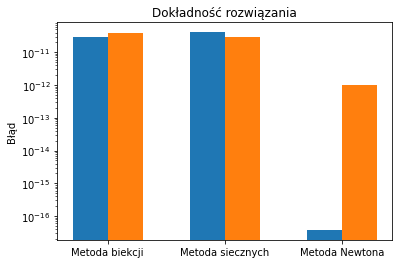

In [7]:
x1 = np.linspace(-1,0.5,100)
x2 = np.linspace(0.5,1.5,100)
#Metoda bisekcji
x1_b,it1 = main.bisection(float(x1[0]),float(x1[-1]),main.fun,10**-10,100)
x2_b,it2 = main.bisection(float(x2[0]),float(x2[-1]),main.fun,10**-10,100)
print("Metoda bisekcji\n")
print("Miejsca zerowe funkcji to: {a} i {b}".format(a=x1_b,b=x2_b))
print("Ilość iteracji to {a} i {b}\n".format(a=it1,b=it2))

#Metoda siecznych
x1_s,it3 = main.secant(float(x1[0]),float(x1[-1]),main.fun,10**-10,100)
x2_s,it4 = main.secant(float(x2[0]),float(x2[-1]),main.fun,10**-10,100)
print("Metoda siecznych\n")
print("Miejsca zerowe funkcji to: {a} i {b}".format(a=x1_s,b=x2_s))
print("Ilość iteracji to {a} i {b}\n".format(a=it3,b=it4))

#Metoda Newtona
x1_n,it5 = main.newton(main.fun,main.dfun,main.ddfun,-1,0.1,10**-10,100)
x2_n,it6 = main.newton(main.fun,main.dfun,main.ddfun,float(x2[0]),float(x2[-1]),10**-10,100)
print("Metoda newtona\n")
print("Miejsca zerowe funkcji to {a} i {b}".format(a=x1_n,b=x2_n))
print("Ilość iteracji to {a} i {b}\n".format(a=it5,b=it6))

#Dokładność rozwiązań
e_b_1 = abs(x0_1 - x1_b)
e_b_2 = abs(x0_2 - x2_b)
e_s_1 = abs(x0_1 - x1_s)
e_s_2 = abs(x0_2 - x2_s)
e_n_1 = abs(x0_1 - x1_n)
e_n_2 = abs(x0_2 - x2_n)
print("Dokładność rozwiązań metodą bisekcji: {a},{b}\n".format(a=e_b_1,b=e_b_2))
print("Dokładność rozwiązań metodą siecznych: {a},{b}\n".format(a=e_s_1,b=e_s_2))
print("Dokładność rozwiązań metodą newtona: {a},{b}\n".format(a=e_n_1,b=e_n_2))

labels = ['Metoda biekcji', 'Metoda siecznych', 'Metoda Newtona']
root1 = [e_b_1, e_s_1, e_n_1]
root2 = [e_b_2, e_s_2, e_n_2]

x = np.arange(len(labels))
width = 0.3

fig, ax = plt.subplots()
rects1 = ax.bar( x-width/2, root1, width)
rects2 = ax.bar(x + width/2, root2, width)

plt.yscale("log")
ax.set_ylabel('Błąd')
ax.set_title('Dokładność rozwiązania')
ax.set_xticks(x)
ax.set_xticklabels(labels)


plt.show()

#Czas obliczeń dla poszczególnych metod
#n = [5,10,15,50,100]
#time_b=[]
#time_s=[]
#time_n=[]

#for i in n:
    #saved_timing = %timeit -r 20 -n 20 -o main.bisection(float(x1[0]),float(x1[-1],main.fun,10**-10,n)
    #time_b.append(saved_timing.average)
    
    #saved_timing = %timeit -r 20 -n 20 -o main.secant(float(x1[0],float(x1[-1]),main.fun,10**-10,n)
    #time_s.append(saved_timing.averag

2.23 µs ± 400 ns per loop (mean ± std. dev. of 20 runs, 20 loops each)
1.94 µs ± 93.8 ns per loop (mean ± std. dev. of 20 runs, 20 loops each)
3.58 µs ± 369 ns per loop (mean ± std. dev. of 20 runs, 20 loops each)
1.91 µs ± 528 ns per loop (mean ± std. dev. of 20 runs, 20 loops each)
2.02 µs ± 539 ns per loop (mean ± std. dev. of 20 runs, 20 loops each)


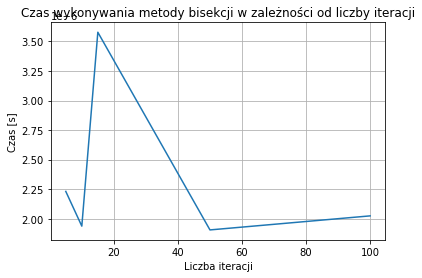

In [8]:
#Czas obliczeń dla metody bisekscji
n = [5,10,15,50,100]
time_b=[]


x1 = np.linspace(-1,0.5,100)
x2=np.linspace(0.5,1.5,100)
for i in n:
    saved_timing = %timeit -r 20 -n 20 -o main.bisection(float(x1[0]), float(x1[-1]), main.fun, 10**-10, n)
    time_b.append(saved_timing.average)
    
    
    
plt.figure()    
plt.plot(n, time_b)
plt.ylabel("Czas [s]")
plt.xlabel("Liczba iteracji")
plt.title("Czas wykonywania metody bisekcji w zależności od liczby iteracji")
plt.grid(True)
plt.show()



2 µs ± 235 ns per loop (mean ± std. dev. of 20 runs, 20 loops each)
1.98 µs ± 246 ns per loop (mean ± std. dev. of 20 runs, 20 loops each)
1.85 µs ± 168 ns per loop (mean ± std. dev. of 20 runs, 20 loops each)
1.68 µs ± 70.9 ns per loop (mean ± std. dev. of 20 runs, 20 loops each)
2.8 µs ± 696 ns per loop (mean ± std. dev. of 20 runs, 20 loops each)


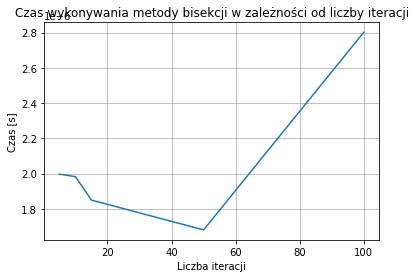

In [9]:
#Czas obliczeń dla poszczególnych dla metody siecznych
n = [5,10,15,50,100]

time_s=[]


for i in n:
    saved_timing = %timeit -r 20 -n 20 -o main.secant(float(x1[0]), float(x1[-1]), main.fun, 10**-10, n)
    time_s.append(saved_timing.average)
    
    
    
plt.plot(n, time_s)
plt.ylabel("Czas [s]")
plt.xlabel("Liczba iteracji")
plt.title("Czas wykonywania metody siecznych w zależności od liczby iteracji")
plt.grid(True)
plt.show()

The slowest run took 7.86 times longer than the fastest. This could mean that an intermediate result is being cached.
2.05 µs ± 956 ns per loop (mean ± std. dev. of 100 runs, 100 loops each)
The slowest run took 6.30 times longer than the fastest. This could mean that an intermediate result is being cached.
1.75 µs ± 867 ns per loop (mean ± std. dev. of 100 runs, 100 loops each)
The slowest run took 9.94 times longer than the fastest. This could mean that an intermediate result is being cached.
1.78 µs ± 1.15 µs per loop (mean ± std. dev. of 100 runs, 100 loops each)
The slowest run took 15.42 times longer than the fastest. This could mean that an intermediate result is being cached.
2.22 µs ± 2.07 µs per loop (mean ± std. dev. of 100 runs, 100 loops each)
The slowest run took 10.27 times longer than the fastest. This could mean that an intermediate result is being cached.
2.08 µs ± 1.53 µs per loop (mean ± std. dev. of 100 runs, 100 loops each)


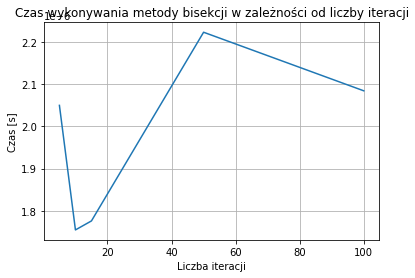

In [10]:
#Czas obliczeń dla metody newtona
n = [5,10,15,50,100]

time_n=[]

for i in n:
    saved_timing = %timeit -r 20 -n 20 -o main.newton(main.fun, main.dfun, main.ddfun, -0.25, 0.2, 1e-10, n)
    time_n.append(saved_timing.average)
    
    
    
plt.plot(n, time_n)
plt.ylabel("Czas [s]")
plt.xlabel("Liczba iteracji")
plt.title("Czas wykonywania metody newtona w zależności od liczby iteracji")
plt.grid(True)
plt.show()

**Wnioski:**
Ćwiczenia te pozwoliły mi zapoznać się z rozwiązywaniami równań nieliniowych metodami bisekcji, siecznych oraz metodą newtona. Na początku należało zdefiniować funkcje dla każdej z podanych wyżej metod. Musieliśmy znać warunki oraz poszczególny algorytm dla metody. Do szukania miejsc zerowych korzystaliśmy również z gotowych bibliotek scipy.optimize. Według mnie są one najprecyzyniejsze oraz najszybsze. W ostatnim zadaniu dla tej samej funkcji szukaliśmy miejsc zerowych trzema metodami. Najdokładniejszą metodą okazała się być metoda Newtona, która praktycznie osiągnęła zero maszynowe. Jest ona również najszybciej zbieżna do rozwiązania, jednak stawia ona największe wymagania co do kstałtu badanej funkcji. Pozostałe metody są nieznacznie wolniejsze. Ilość iteracji nie ma większego wpływu na czas obliczeń. Metody siecznych oraz bisekcji są mniej dokładne od metody newtona. Największą wadę posaida metoda bisekcji ponieważ ilość wykonań pętli zależy od tego w którym miejscu przedziału 
